In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import scipy.stats.mstats as mst
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

all_data = pd.read_csv('991_CleanedData.csv', low_memory=False)

In [3]:
data = all_data[['DISC_SCORE0', 'LV_AGE_DIFF0', 'RACE', 'CVD', 'DEGREE', 'INCOME0', 'CRPRESU0', 'MOD_PSTRESS', 'BMI0']]

#Features Selection#

**Race**: since race seems to be significantly associated with many of the variables of interest, all of the spearman correlation coefficients will be stratified by race first.

Variables of interest:

- C-Reactive Protein levels
- Perceived stress score
- CVD (binary)
- Education (will need to add dummy variables)
- Income (will need to add dummy variables)

In [4]:
black = data[data.RACE == 'Black']
asian = data[data.RACE == 'Asian']
white = data[data.RACE == 'Caucasian']
hispanic = data[data.RACE == 'Hispanic']

In [5]:
black_corr = black.corr(method='spearman')
asian_corr = asian.corr(method='spearman')
white_corr = white.corr(method='spearman')
hispanic_corr = hispanic.corr(method='spearman')

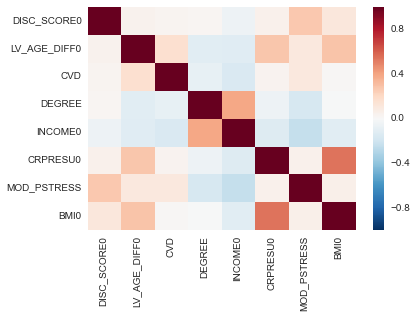

In [6]:
sns.heatmap(black_corr)

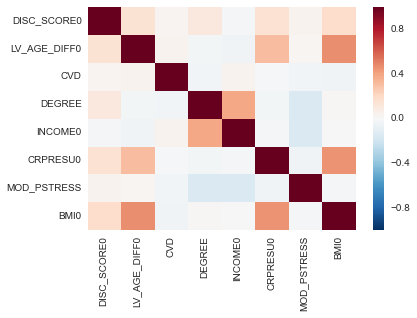

In [7]:
sns.heatmap(asian_corr)

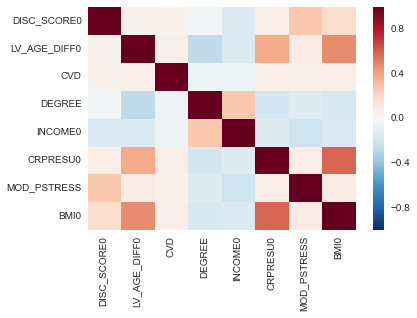

In [8]:
sns.heatmap(white_corr)

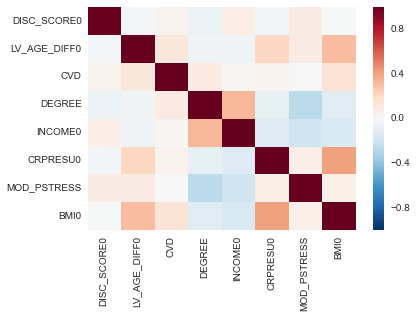

In [9]:
sns.heatmap(hispanic_corr)

In [10]:
black.shape

(922, 9)

In [11]:
white.shape

(1529, 9)

In [12]:
asian.shape

(529, 9)

In [13]:
hispanic.shape

(282, 9)

In [14]:
black_corr.to_csv('81_Black-S-Unadjusted.csv', index=False)
white_corr.to_csv('81_White-S-Unadjusted.csv', index=False)
asian_corr.to_csv('81_Asian-S-Unadjusted.csv', index=False)
hispanic_corr.to_csv('81_Hispanic-S-Unadjusted.csv', index=False)

In [15]:
data_corr = data.corr(method='spearman')

data_corr.to_csv('81_All-S-Unadjusted.csv', index=False)

In [16]:
sp.stats.spearmanr(black.DISC_SCORE0, black.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.039373178212595519, pvalue=0.23232689526335049)

In [17]:
sp.stats.spearmanr(white.DISC_SCORE0, white.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.04236697248422764, pvalue=0.097713667628275547)

In [18]:
sp.stats.spearmanr(asian.DISC_SCORE0, asian.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.14655999341816603, pvalue=0.00072175055627649238)

In [19]:
sp.stats.spearmanr(hispanic.DISC_SCORE0, hispanic.LV_AGE_DIFF0)

SpearmanrResult(correlation=-0.018980750044722359, pvalue=0.75097512903498198)

In [20]:
sp.stats.spearmanr(data.DISC_SCORE0, data.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.052270585216338851, pvalue=0.0028239823878181323)

In [21]:
sp.stats.spearmanr(black.MOD_PSTRESS, black.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.10672973541596818, pvalue=0.0011717525237669548)

In [22]:
sp.stats.spearmanr(white.MOD_PSTRESS, white.LV_AGE_DIFF0)

SpearmanrResult(correlation=0.078424266357767683, pvalue=0.0021492135141301335)